## Importing libraries


In [103]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

from xgboost import XGBClassifier
from sklearn.svm import SVC


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import LSTM, Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D

from keras.utils import plot_model

## Importing Dataset

In [104]:
df=pd.read_csv("data/DDos.csv")

## Dataset Cleaning / Preprocessing

In [105]:
num_rows = len(df.index)
num_cols = len(df.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 66237
Number of columns: 79


In [106]:
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [107]:
# Removing unwanted space\tab before coulmn names
df.columns = df.columns.str.strip()

In [108]:
#Unique values in the Label target column
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

Here
BENIGN: Normal User or Original Customer
DDOS: attacker


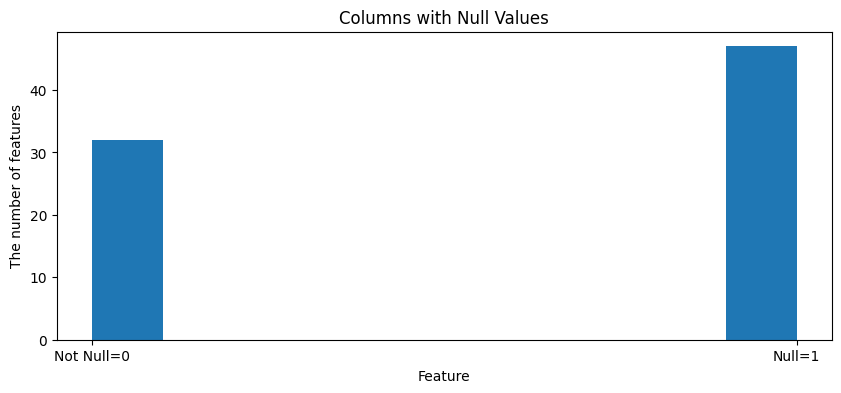

In [109]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()


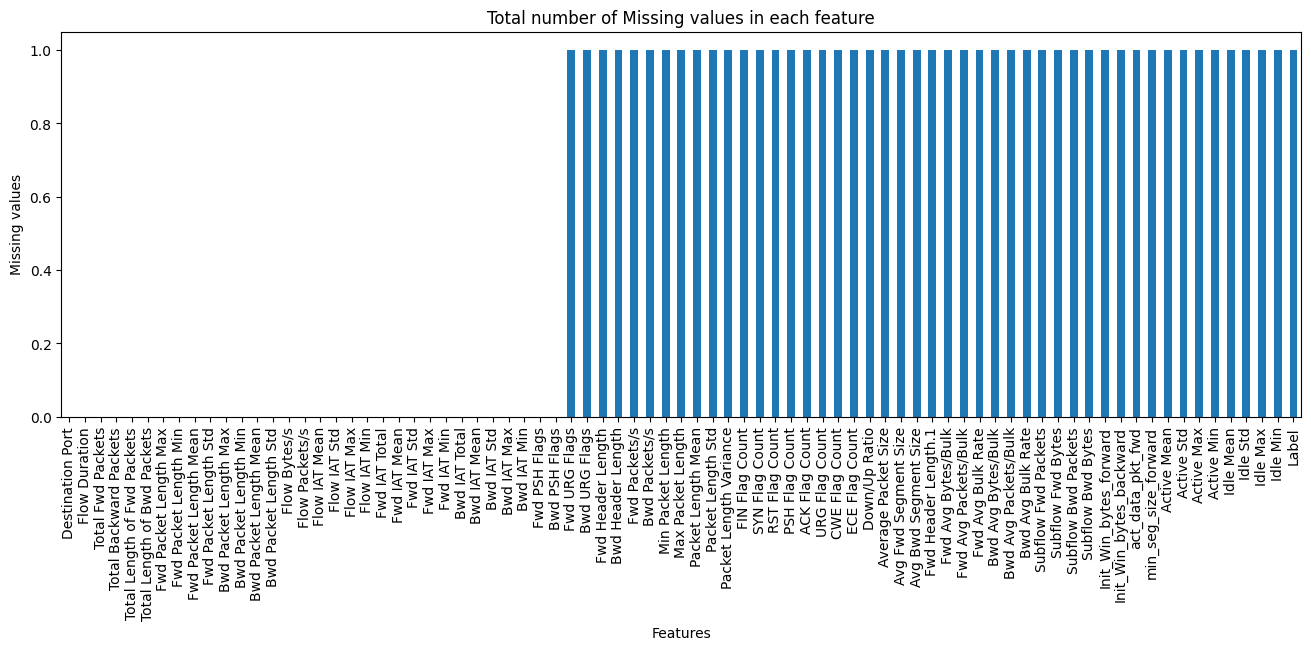

In [110]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)


In [111]:
## Removing the null values
data_f=df.dropna()

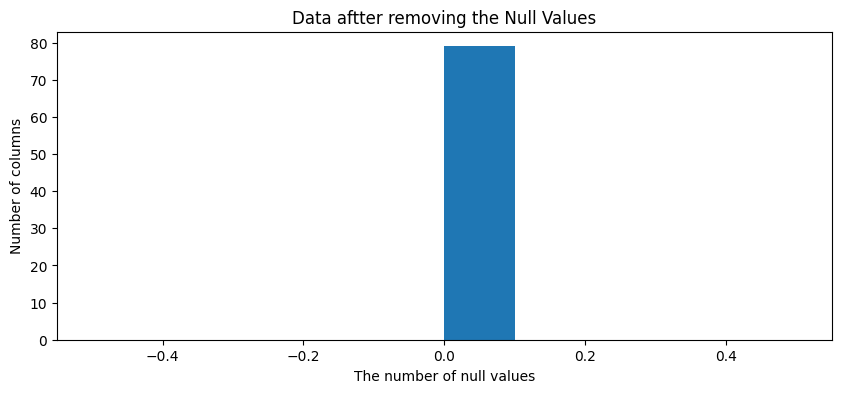

In [112]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()


In [113]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Check for NaN values

/var/folders/qy/x37f5yq90xg5_8j8gyk95jfh0000gn/T/ipykernel_28306/783324428.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Treat inf as NaN


In [114]:
# To know the data types of the columns

(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [115]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

/var/folders/qy/x37f5yq90xg5_8j8gyk95jfh0000gn/T/ipykernel_28306/172444858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


BENIGN count: 31284
DDoS count: 34952


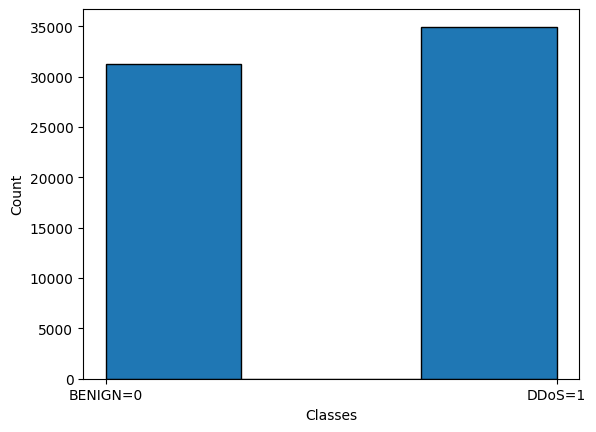

In [116]:
# Count the occurrences of each class
class_counts = data_f['Label'].value_counts()

# Print the counts
print("BENIGN count:", class_counts[0])
print("DDoS count:", class_counts[1])


# Print the DataFrame
plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

## Data Exploring


In [117]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


#### Plot the distribution of the features:

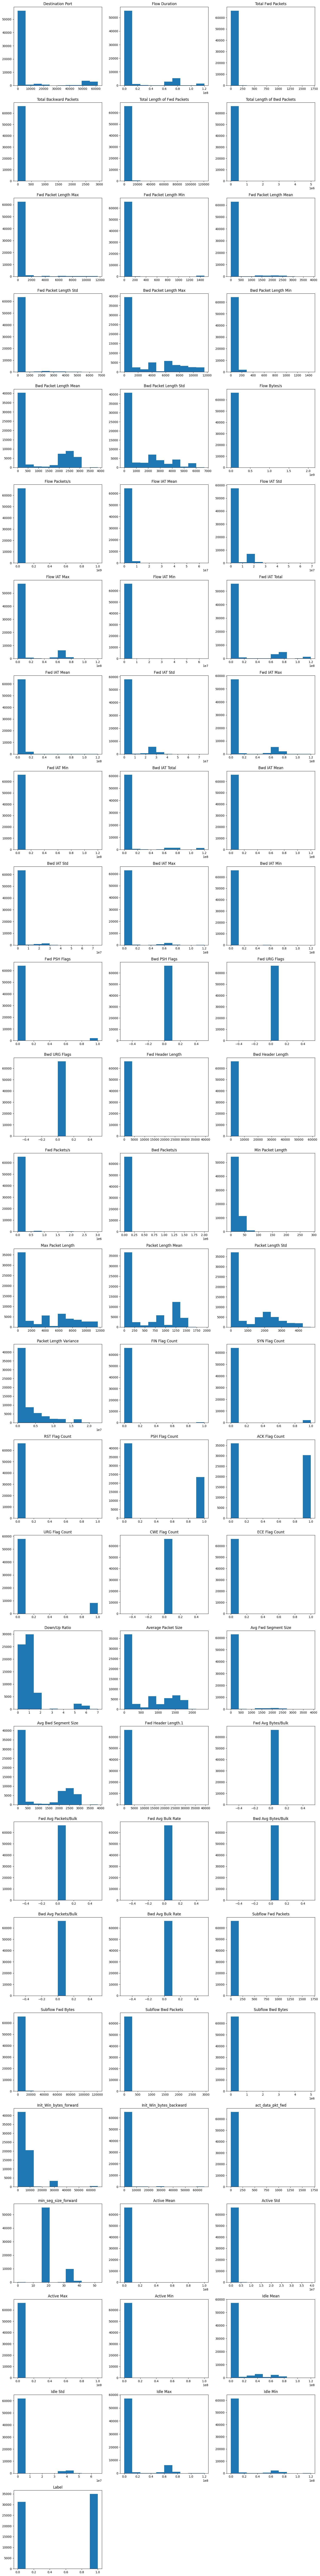

In [118]:
## plt.figure(5)
## for col in data_f.columns:
##    plt.hist(data_f[col])
##    plt.title(col)
##    plt.show()

# Determine grid dimensions (adjust these if needed)
num_plots = len(data_f.columns)
num_cols = 3  # Number of columns in the grid
num_rows = int(np.ceil(num_plots / num_cols))  # Calculate number of rows

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 120))  # Adjust figsize as needed

# Flatten the axes array to easily iterate
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(data_f.columns):
    axes[i].hist(data_f[col])
    axes[i].set_title(col)

# Hide unused subplots (if any)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


In [119]:
X = data_f.drop('Label', axis=1)
y = data_f['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [120]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)


## Random Forest

In [121]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

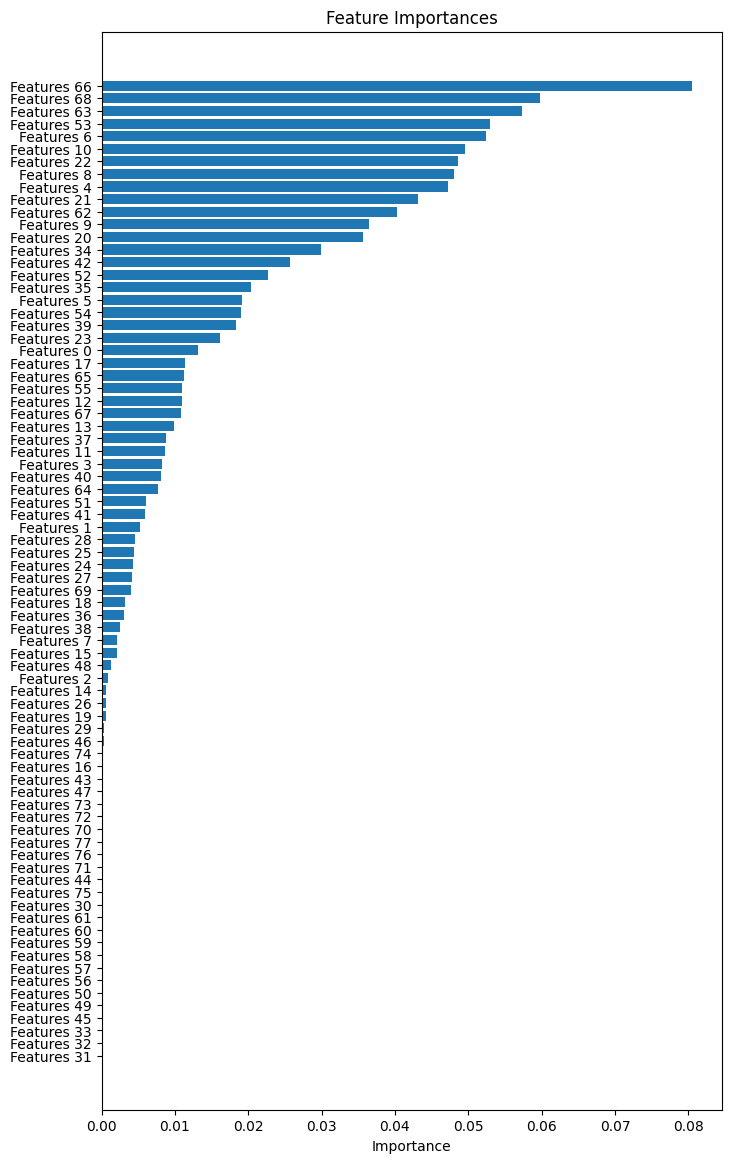

In [122]:
importances = rf_model.feature_importances_

indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # feature number instead of column names

plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

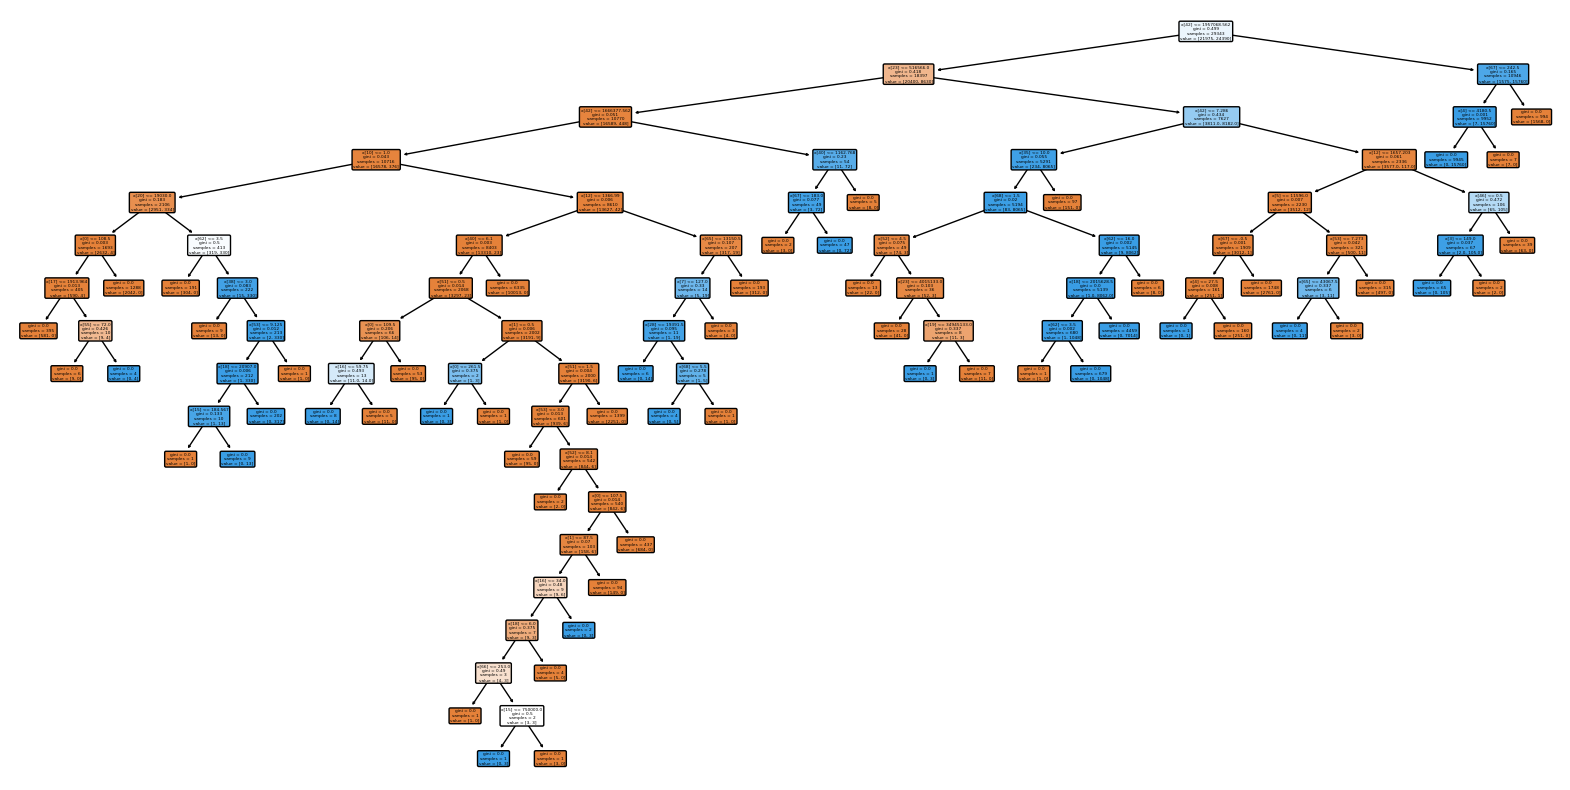

In [123]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0] 

plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [124]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [125]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')



Random Forest Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


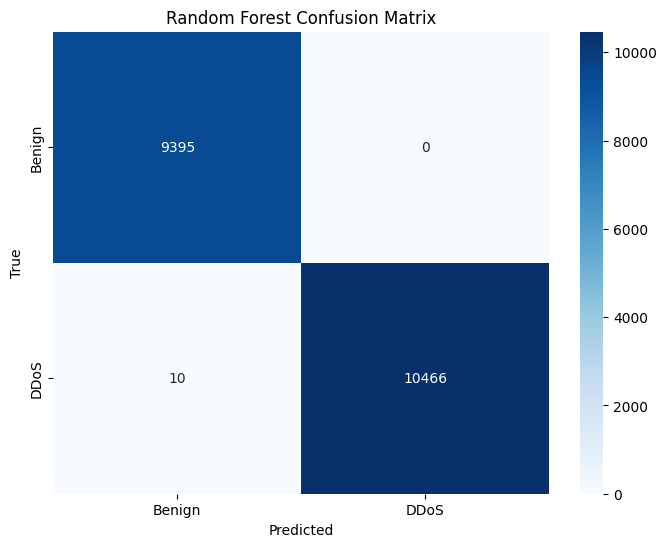

In [126]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

## Logistic Regression

In [127]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [129]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')



Logistic Regression Metrics:
Accuracy: 0.9445
F1 Score: 0.9497
Precision: 0.9092
Recall: 0.9940


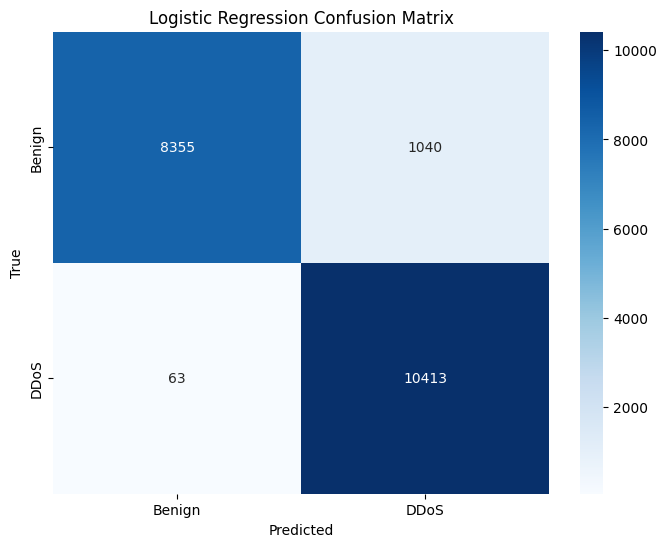

In [130]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')


## (Multi-Layer Perceptron) Neural Network

In [131]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

/opt/homebrew/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [132]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')



Neural Network Metrics:
Accuracy: 0.9765
F1 Score: 0.9781
Precision: 0.9616
Recall: 0.9951


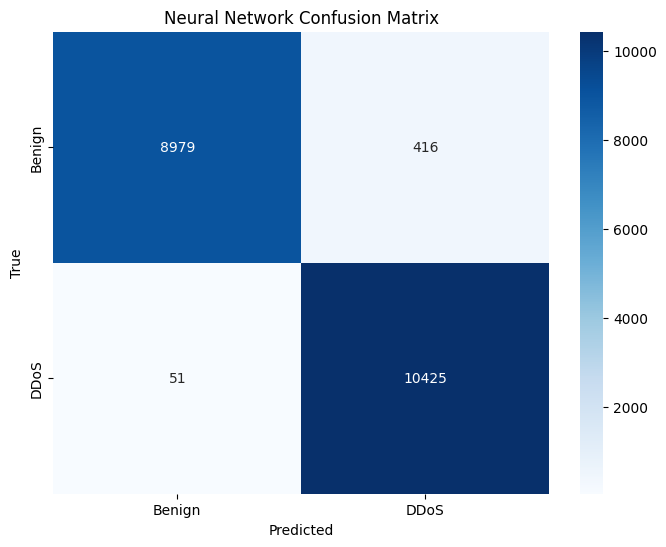

In [133]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

## XGBOOST

In [134]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


In [135]:
# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)

print('\nXGBoost Metrics:')
print(f'Accuracy: {xgb_accuracy:.4f}')
print(f'F1 Score: {xgb_f1:.4f}')
print(f'Precision: {xgb_precision:.4f}')
print(f'Recall: {xgb_recall:.4f}')




XGBoost Metrics:
Accuracy: 0.9996
F1 Score: 0.9996
Precision: 1.0000
Recall: 0.9992


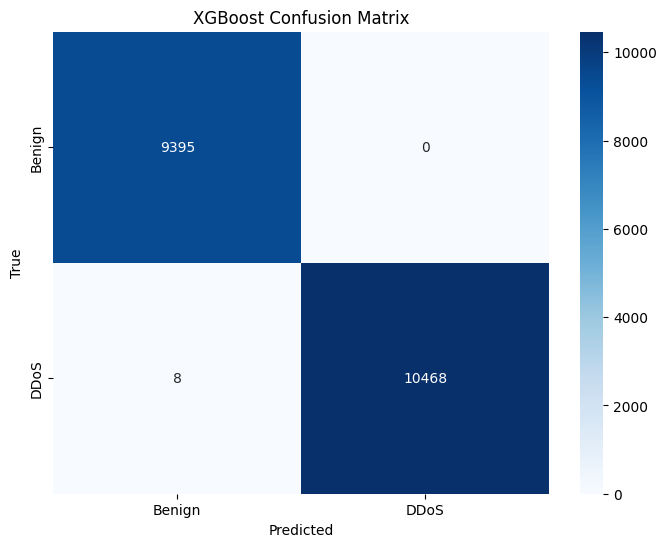

In [136]:
# Confusion Matrix for XGBoost
plot_confusion_matrix(y_test, xgb_pred, ['Benign', 'DDoS'], 'XGBoost Confusion Matrix')

## SVM Model

In [137]:
# SVM Model
svm_model = SVC(kernel='rbf', random_state=42) 
# Train SVM
svm_model.fit(X_train, y_train)

# Predict using SVM
svm_pred = svm_model.predict(X_test)

In [138]:
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

In [139]:
print('\nSVM Metrics:')
print(f'Accuracy: {svm_accuracy:.4f}')
print(f'F1 Score: {svm_f1:.4f}')
print(f'Precision: {svm_precision:.4f}')
print(f'Recall: {svm_recall:.4f}')




SVM Metrics:
Accuracy: 0.9517
F1 Score: 0.9540
Precision: 0.9568
Recall: 0.9513


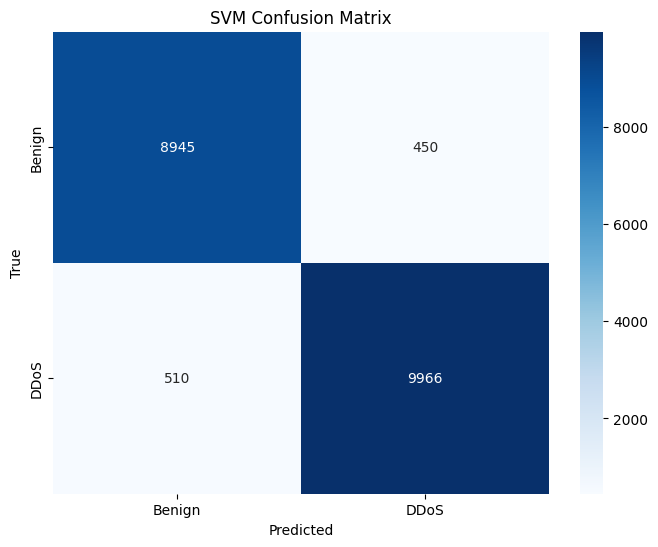

In [140]:
# Confusion Matrix for SVM
plot_confusion_matrix(y_test, svm_pred, ['Benign', 'DDoS'], 'SVM Confusion Matrix')

## KNN


In [141]:
# To Represent the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [142]:
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)

In [143]:
print('\nKNN Metrics:')
print(f'Accuracy: {knn_accuracy:.4f}')
print(f'F1 Score: {knn_f1:.4f}')
print(f'Precision: {knn_precision:.4f}')
print(f'Recall: {knn_recall:.4f}')


KNN Metrics:
Accuracy: 0.9966
F1 Score: 0.9968
Precision: 0.9951
Recall: 0.9985


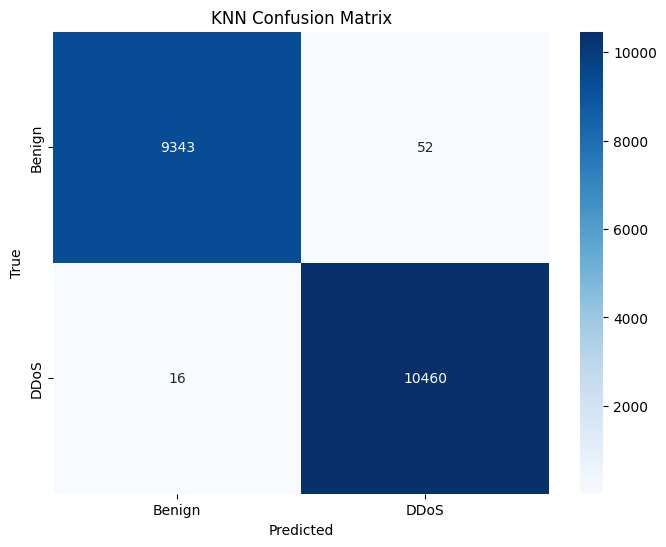

In [144]:
# Confusion Matrix for KNN
plot_confusion_matrix(y_test, knn_pred, ['Benign', 'DDoS'], 'KNN Confusion Matrix')


## 2D CNN

In [145]:
# Save original columns before scaling
original_columns = X_train.columns

# Data Preparation for 2D CNN (Using StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Feature Groups
feature_groups = {
    'Packet_Counts': ['Total Fwd Packets', 'Total Backward Packets'],
    'Packet_Lengths': ['Total Length of Fwd Packets', 'Total Length of Bwd Packets'],
    'Length_Stats': ['Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std'],
    'Flow_Features': ['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s'],
    'IAT_Features': ['Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min'],
}

# Function to Reshape to 2D Grid
def reshape_to_grid(X, feature_groups, grid_size, original_columns):  
    reshaped_X = []
    for i in range(len(X)):
        grid = np.zeros(grid_size)
        idx = 0
        for group_name, features in feature_groups.items():
            for f in features:
                if f in original_columns:  
                    try:
                        grid[idx // grid_size[1], idx % grid_size[1]] = X[i][original_columns.get_loc(f)]
                    except IndexError as e:
                        print(f"Index error at row {i}, feature {f}, idx {idx}: {e}")
                        return None
                    idx += 1
        reshaped_X.append(grid)
    return np.array(reshaped_X).reshape(X.shape[0], *grid_size, 1) 

# Determine Grid Size based on Feature Groups
grid_size = (len(feature_groups), max([len(f) for f in feature_groups.values()]))

# Reshape to 2D Grid (Pass original_columns)
X_train_cnn2d = reshape_to_grid(X_train_scaled, feature_groups, grid_size, original_columns)
X_test_cnn2d = reshape_to_grid(X_test_scaled, feature_groups, grid_size, original_columns)

# 2D CNN Model 
model_cnn2d = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*grid_size, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_cnn2d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the 2D CNN
model_cnn2d.fit(X_train_cnn2d, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn2d, y_test))

Epoch 1/10


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1449/1449 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8945 - loss: 0.2627 - val_accuracy: 0.9831 - val_loss: 0.0808
Epoch 2/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.9875 - loss: 0.0550 - val_accuracy: 0.9923 - val_loss: 0.0446
Epoch 3/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.9916 - loss: 0.0348 - val_accuracy: 0.9932 - val_loss: 0.0277
Epoch 4/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.9932 - loss: 0.0271 - val_accuracy: 0.9984 - val_loss: 0.0434
Epoch 5/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9951 - loss: 0.0321 - val_accuracy: 0.9975 - val_loss: 0.0265
Epoch 6/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.9970 - loss: 0.0242 - val_accuracy: 0.9984 - val_loss: 0.0242
Epoch 7/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.9973 - loss: 0.0188 - val_accuracy: 0.9978 - val_loss: 0.0283
Epoch 8/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9975 - loss: 0.0200 - v

In [146]:
    # Predict Probabilities
    cnn2d_pred_proba = model_cnn2d.predict(X_test_cnn2d)

    # Convert Probabilities to Class Labels (Threshold at 0.5)
    cnn2d_pred = (cnn2d_pred_proba > 0.5).astype(int)

    # Calculate Evaluation Metrics for 2D CNN
    cnn2d_accuracy = accuracy_score(y_test, cnn2d_pred)
    cnn2d_f1 = f1_score(y_test, cnn2d_pred)
    cnn2d_precision = precision_score(y_test, cnn2d_pred)
    cnn2d_recall = recall_score(y_test, cnn2d_pred)



621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step


In [147]:
# Display Results
print('\n2D CNN Metrics:')
print(f'Accuracy: {cnn2d_accuracy:.4f}')
print(f'F1 Score: {cnn2d_f1:.4f}')
print(f'Precision: {cnn2d_precision:.4f}')
print(f'Recall: {cnn2d_recall:.4f}')
    



2D CNN Metrics:
Accuracy: 0.9987
F1 Score: 0.9988
Precision: 0.9991
Recall: 0.9985


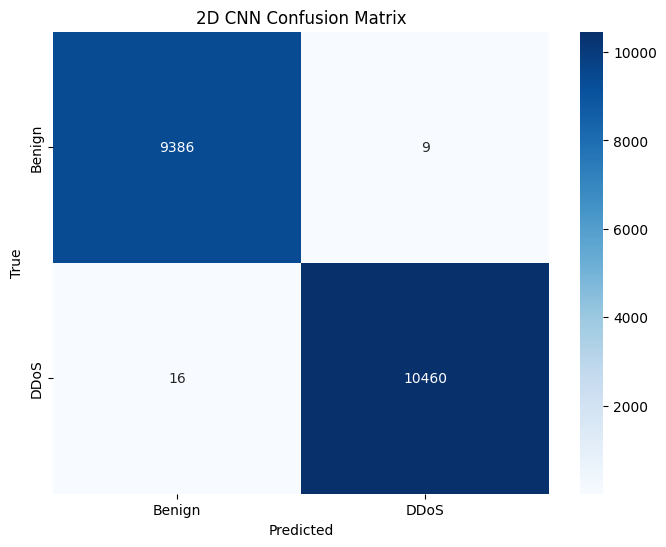

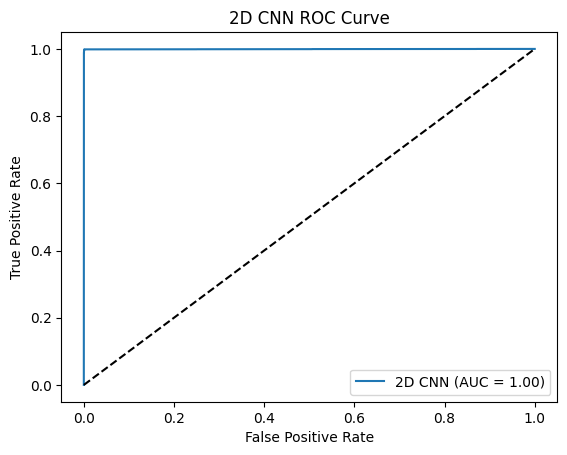

In [148]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, cnn2d_pred, ['Benign', 'DDoS'], '2D CNN Confusion Matrix')

# ROC Curve and AUC (Optional)
fpr, tpr, _ = roc_curve(y_test, cnn2d_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'2D CNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('2D CNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

## LSTM

In [149]:
# Data Preparation for LSTM (Reusing the scaled data from 2D CNN)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# LSTM Model
model_lstm = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),  # Optional dropout for regularization
    Dense(1, activation='sigmoid')  # Binary classification
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and Evaluate LSTM
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/10


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1449/1449 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9733 - loss: 0.1280 - val_accuracy: 0.9987 - val_loss: 0.0110
Epoch 2/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.9976 - loss: 0.0107 - val_accuracy: 0.9991 - val_loss: 0.0067
Epoch 3/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.9989 - loss: 0.0056 - val_accuracy: 0.9992 - val_loss: 0.0057
Epoch 4/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9989 - val_loss: 0.0050
Epoch 5/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 6/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 7/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 8/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.9993 - loss: 0.0022

In [150]:
# Predict Probabilities
lstm_pred_proba = model_lstm.predict(X_test_lstm)
lstm_pred = (lstm_pred_proba > 0.5).astype(int)

# Calculate Evaluation Metrics for LSTM
lstm_accuracy = accuracy_score(y_test, lstm_pred)
lstm_f1 = f1_score(y_test, lstm_pred)
lstm_precision = precision_score(y_test, lstm_pred)
lstm_recall = recall_score(y_test, lstm_pred)

621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


In [151]:
# Display Results
print('\nLSTM Metrics:')
print(f'Accuracy: {lstm_accuracy:.4f}')
print(f'F1 Score: {lstm_f1:.4f}')
print(f'Precision: {lstm_precision:.4f}')
print(f'Recall: {lstm_recall:.4f}')




LSTM Metrics:
Accuracy: 0.9992
F1 Score: 0.9993
Precision: 0.9996
Recall: 0.9989


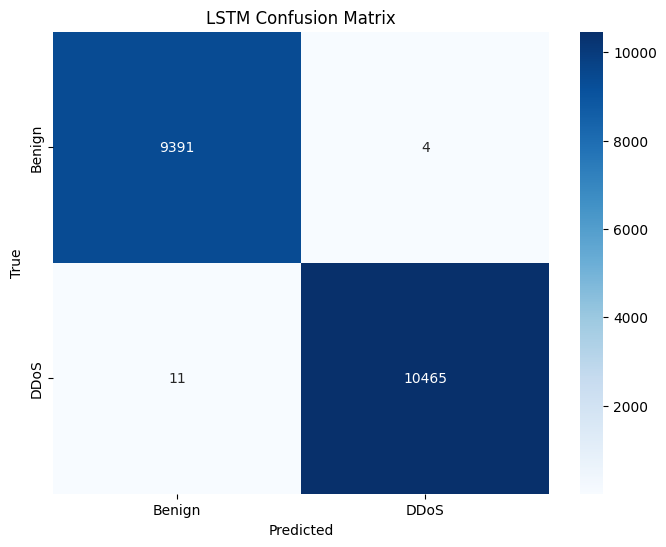

In [152]:
# Plot Confusion Matrix (Using your plot_confusion_matrix function)
plot_confusion_matrix(y_test, lstm_pred, ['Benign', 'DDoS'], 'LSTM Confusion Matrix')

## 1D CNN

In [153]:
# 1D CNN Model
model_cnn1d = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_cnn1d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape for 1D CNN (add channel dimension)
X_train_cnn1d = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn1d = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Train the 1D CNN
model_cnn1d.fit(X_train_cnn1d, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn1d, y_test))

Epoch 1/10


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1449/1449 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9833 - loss: 0.0580 - val_accuracy: 0.9978 - val_loss: 0.0196
Epoch 2/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9983 - loss: 0.0086 - val_accuracy: 0.9987 - val_loss: 0.0104
Epoch 3/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9989 - loss: 0.0089 - val_accuracy: 0.9993 - val_loss: 0.0029
Epoch 4/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9991 - val_loss: 0.0069
Epoch 5/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9990 - val_loss: 0.0055
Epoch 6/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 7/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9986 - val_loss: 0.0036
Epoch 8/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accurac

In [154]:
# Predict Probabilities
cnn1d_pred_proba = model_cnn1d.predict(X_test_cnn1d)

# Convert Probabilities to Class Labels (Threshold at 0.5)
cnn1d_pred = (cnn1d_pred_proba > 0.5).astype(int)

# Calculate Evaluation Metrics for 1D CNN
cnn1d_accuracy = accuracy_score(y_test, cnn1d_pred)
cnn1d_f1 = f1_score(y_test, cnn1d_pred)
cnn1d_precision = precision_score(y_test, cnn1d_pred)
cnn1d_recall = recall_score(y_test, cnn1d_pred)

621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


In [155]:
# Display Results
print('\n1D CNN Metrics:')
print(f'Accuracy: {cnn1d_accuracy:.4f}')
print(f'F1 Score: {cnn1d_f1:.4f}')
print(f'Precision: {cnn1d_precision:.4f}')
print(f'Recall: {cnn1d_recall:.4f}')





1D CNN Metrics:
Accuracy: 0.9989
F1 Score: 0.9990
Precision: 0.9984
Recall: 0.9995


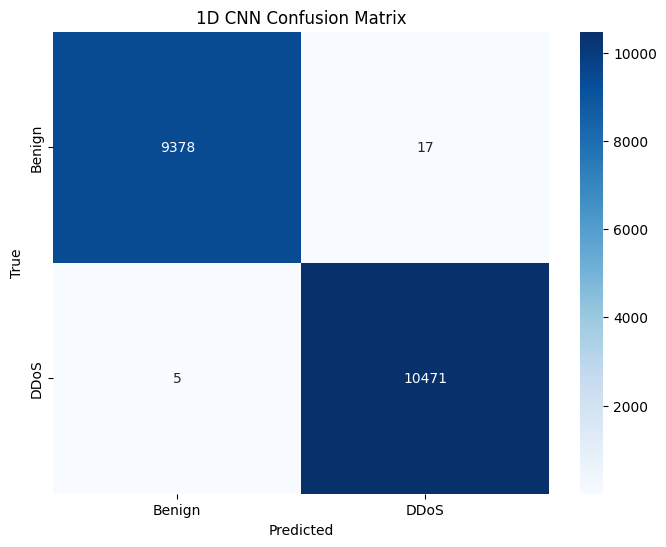

In [156]:
# Plot Confusion Matrix (Using your plot_confusion_matrix function)
plot_confusion_matrix(y_test, cnn1d_pred, ['Benign', 'DDoS'], '1D CNN Confusion Matrix')




In [157]:
# # ROC Curve and AUC (Optional)
# fpr, tpr, _ = roc_curve(y_test, cnn1d_pred_proba)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, label=f'1D CNN (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('1D CNN ROC Curve')
# plt.legend(loc='lower right')
# plt.show()

## CNN+LSTM

In [158]:
# CNN-LSTM Model
# Reshape for CNN-LSTM (reusing X_train_scaled from 2D CNN or LSTM)
X_train_cnnlstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)  
X_test_cnnlstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1) 

model_cnnlstm = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnnlstm.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64),  # LSTM layer
    Dropout(0.2),  # Optional dropout for regularization
    Dense(1, activation='sigmoid')
])

model_cnnlstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and Evaluate CNN-LSTM
model_cnnlstm.fit(X_train_cnnlstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnnlstm, y_test))


Epoch 1/10


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1449/1449 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9184 - loss: 0.1808 - val_accuracy: 0.9876 - val_loss: 0.0250
Epoch 2/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9889 - loss: 0.0314 - val_accuracy: 0.9957 - val_loss: 0.0159
Epoch 3/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9941 - loss: 0.0214 - val_accuracy: 0.9980 - val_loss: 0.0085
Epoch 4/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9976 - loss: 0.0094 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 5/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9977 - loss: 0.0091 - val_accuracy: 0.9917 - val_loss: 0.0230
Epoch 6/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9990 - val_loss: 0.0044
Epoch 7/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9987 - loss: 0.0055 - val_accuracy: 0.9958 - val_loss: 0.0123
Epoch 8/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9982 - loss: 0.0066 

In [159]:
# # Visualize model architecture
# plot_model(model_cnnlstm, to_file='cnn_lstm_model.png', show_shapes=True, show_layer_names=True)

# # # Display the plot
# # img = plt.imread('cnn_lstm_model.png')
# # plt.figure(figsize=(10, 10))  # Adjust figure size as needed
# # plt.imshow(img)
# # plt.axis('off')
# # plt.show()

In [160]:
# Predict Probabilities
cnnlstm_pred_proba = model_cnnlstm.predict(X_test_cnnlstm)

# Convert Probabilities to Class Labels (Threshold at 0.5)
cnnlstm_pred = (cnnlstm_pred_proba > 0.5).astype(int)

# Calculate Evaluation Metrics for CNN-LSTM
cnnlstm_accuracy = accuracy_score(y_test, cnnlstm_pred)
cnnlstm_f1 = f1_score(y_test, cnnlstm_pred)
cnnlstm_precision = precision_score(y_test, cnnlstm_pred)   
cnnlstm_recall = recall_score(y_test, cnnlstm_pred)


621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step



CNN-LSTM Metrics:
Accuracy: 0.9952
F1 Score: 0.9954
Precision: 0.9997
Recall: 0.9912


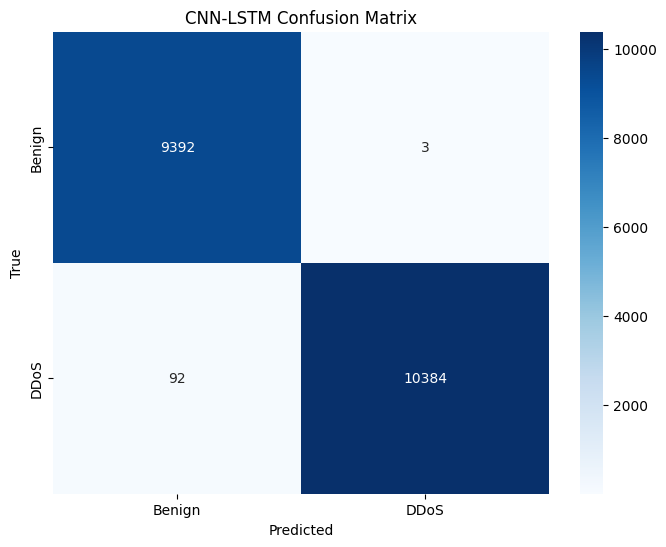

In [161]:

# Display Results
print('\nCNN-LSTM Metrics:')
print(f'Accuracy: {cnnlstm_accuracy:.4f}')
print(f'F1 Score: {cnnlstm_f1:.4f}')
print(f'Precision: {cnnlstm_precision:.4f}')
print(f'Recall: {cnnlstm_recall:.4f}')



# Plot Confusion Matrix
plot_confusion_matrix(y_test, cnnlstm_pred, ['Benign', 'DDoS'], 'CNN-LSTM Confusion Matrix')




In [162]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)

# Multi Layer Network
nn_proba = nn_model.predict_proba(X_test)

# XGBoost
xgb_proba = xgb_model.predict_proba(X_test)

# SVM
svm_proba = svm_model.decision_function(X_test)

# KNN
knn_proba = knn_model.predict_proba(X_test)

# 2D CNN
cnn2d_proba = model_cnn2d.predict(X_test_cnn2d)

# LSTM
lstm_proba = model_lstm.predict(X_test_lstm)

# 1D CNN
cnn1d_proba = model_cnn1d.predict(X_test_cnn1d)

# CNN-LSTM
cnnlstm_proba = model_cnnlstm.predict(X_test_cnnlstm)



621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step
621/621 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [163]:
# Combine predictions for ROC curve

# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

# Calculate ROC curve for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_proba[:, 1])
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Calculate ROC curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba)
svm_auc = auc(svm_fpr, svm_tpr)

# Calculate ROC curve for KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_proba[:, 1])
knn_auc = auc(knn_fpr, knn_tpr)

# Calculate ROC curve for 2D CNN
cnn2d_fpr, cnn2d_tpr, _ = roc_curve(y_test, cnn2d_proba)
cnn2d_auc = auc(cnn2d_fpr, cnn2d_tpr)

# Calculate ROC curve for LSTM
lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_proba)
lstm_auc = auc(lstm_fpr, lstm_tpr)

# Calculate ROC curve for 1D CNN
cnn1d_fpr, cnn1d_tpr, _ = roc_curve(y_test, cnn1d_proba)
cnn1d_auc = auc(cnn1d_fpr, cnn1d_tpr)

# Calculate ROC curve for CNN-LSTM
cnnlstm_fpr, cnnlstm_tpr, _ = roc_curve(y_test, cnnlstm_proba)
cnnlstm_auc = auc(cnnlstm_fpr, cnnlstm_tpr)

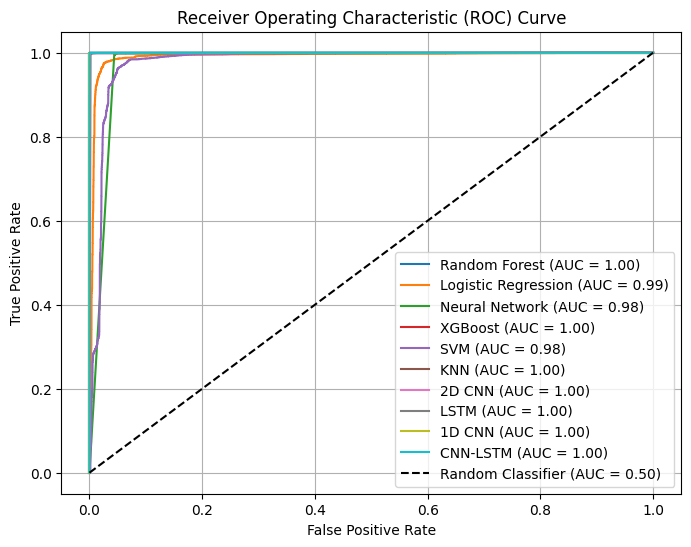

In [164]:
# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(cnn2d_fpr, cnn2d_tpr, label=f'2D CNN (AUC = {cnn2d_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM (AUC = {lstm_auc:.2f})')
plt.plot(cnn1d_fpr, cnn1d_tpr, label=f'1D CNN (AUC = {cnn1d_auc:.2f})')
plt.plot(cnnlstm_fpr, cnnlstm_tpr, label=f'CNN-LSTM (AUC = {cnnlstm_auc:.2f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()